# Episodic RL & Uncertainty: Experiment 1

Jonathan Nicholas and Daphna Shohamy

07/07/2018

*All analysis code is included at the end of the notebook*

---


## How does reward uncertainty affect the use of episodes in decision making?
### Background
It is well established that uncertainty arbitrates between the use of model-based and model-free control strategies (Daw et al., 2005). While much focus has been placed on when these two systems compete for control, another line of work has suggested that a third control strategy relying on one-shot experiences may also vie for decision making power. An early computational study demonstrated that in the face of computational noise, such as in the beginning of a task or when faced with unreliable samples, using individual episodes to control decision making behavior is a better strategy than relying on incremental methods (Lengyel & Dayan, 2007). Furthermore, recent computational models have demonstrated that optimal decision making policies are learned faster by relying on one-shot experiences before incremental strategies take over, and that these hybrid models outperform purely incremental controllers in a variety of paradigms (Blundell et al., 2016).

It has only recently been suggested that the brain might engage in episodic control of decision making (Gershman & Daw, 2017; Bhui, 2018) and it is currently unknown whether a neurobiological episodic controller might dominate choices in conditions predicted by theory, particularly in cases when incremental systems are unable to converge upon reliable estimates of the average reward (model-free) or generative parameters (model-based) in the environment. While it has been found that reward uncertainty increases episodic encoding (Gerraty et al., 2018 In Prep.) and that episodic and incremental control may compete for resources dedicated to reward processing (Wimmer et al., 2016), no work has explored when individual episodes are the preferred substrate for decisions.

A key determination of whether to use episodic information or not may be the degree of uncertainty that remains in an incremental system. If predictions from either incremental system are poorly fit to the environment, retrieving a highly rewarding episode instead should lead to greater long-term reward.


#### Hypotheses
1) People will rely on individual episodes when incremental control poorly predicts reward outcomes (e.g. when the mapping between choice and outcome is uncertain)

2) Tracking the degree of uncertainty in an incremental controller's estimate is what arbitrates the use of episodic control.

---

### Methods
According to the above, episodic control should be promoted when incremental strategies are disadvantaged. Thus, the goal of this experiment is to have participants make decisions between experienced episodes and options with high/low incremental uncertainty.

##### Participants
115 participants were recruited from Amazon Mechanical Turk. Participants were paid a proportion of their earnings following successful completion of the experiment (earnings*0.01). Participants were required to score 100% on a quiz that tested their comprehension of the experimental instructions before they were allowed to continue with the experiment.

##### Experimental Design
<img src="eprl_variability_mturk_design.jpg" width="700">
<center><h4>Figure 1: Experimental Design </h4></center>

###### Training
Participants first completed a training phase where they were required to choose between two images. Trials were of two types (intermixed). The first type consisted of choices between two circles, one blue and one orange. Participants were informed that one of these options may be more reliable than the other. Outcomes for each circle were sampled from normal distributions where:

    Reliable ~ Normal(0.6, 0.05)
    Unreliable ~ Normal(0.6, 0.2)
    
Such that either option had an identical average of 0.6 with differing variances. Outcomes were truncated at 0 and 1.2 on these distributions. The second type of trial consisted of choices between two objects. Participants were informed that whenever they saw a repeated object, that object would be worth the same amount of money. Each chosen object was repeated, at most, one time. Object outcomes were discrete, with either a high or low value:

    High = 1.2
    Low = 0
    
Such that the average outcome of choosing a new object was equal to choosing either circle (0.6).  The figure immediately below is a visual depiction of these outcome distributions. 

Lastly, each participant completed 300 training trials, where 60% were choices between objects and 40% were choices between circles. On each object trial, there was a 30% chance of seeing an old object.These proportions were arrived at through trial and error in order to maximize the number repeated objects seen during the test phase.

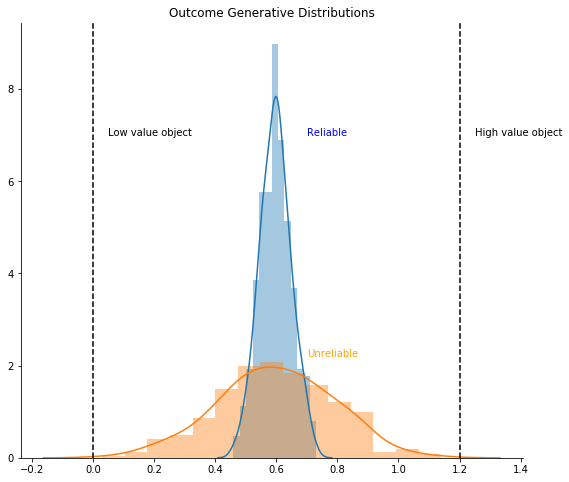

In [14]:
plt.figure(figsize=(9, 8))
plot_generative(nTimepoints=300)

###### Testing

Following completion of the training phase, participants were required to choose between one of the circles and an object. There was no feedback about choice outcomes during this phase. Importantly, 50% of objects were previously seen only once during the training phase, and were shown again no more than once during the test phase. Participants completed 150 test trials, with an average of 75 previously seen objects.

Importantly, the objects' values were set during training such that it would always be optimal to choose a previously seen high valued object, and to ignore a previously seen low valued object.

---

### Results: Test Phase

##### Prediction
If incremental and episodic retrieval strategies compete for control and are arbitrated by the degree of uncertainty in the incremental controller, then we predict that previously seen objects should be chosen more frequently when participants are faced with a decision between an old object and the unreliable circle compared to a decision between an old object and the reliable circle. Furthermore, high valued old objects should be chosen more frequently than low valued old objects in both conditions.

In [345]:
# Prepare data for plotting. All functions located at end of notebook

global exclude_response
global exclude_blur

# these parameters exclude very few people
exclude_response = .6
exclude_blur = 100
# Load the screentime data
int_data, exclude_pids = loadData(dType="interaction")
exclude_pids = map(int,exclude_pids)
# Load the experiment data
data = loadData(dType="experiment")[0]
# Clean the dataframe
agg_data = aggregateTestData(data=data, exclude_pids=exclude_pids)
# Calculate random performance
random_perf = gen_random_performance(data=data,n_sims=50)
# Get # of times clicked out of experiment
n_blurs = int_data[int_data.event == "blur"] \
            .groupby(['subjectID','event']) \
            .size() \
            .reset_index(name="n_blurs")
# Add # blurs to the cleaned data
agg_data['n_blurs'] = agg_data['pid'].apply(get_blurs)
# Subtract actual from random
agg_data['performance'] = agg_data['pid'].apply(get_relative_perf)
# Scale pOld by datapoints
agg_data['pOld_scaled'] = agg_data['pOld'] * agg_data['propResponse']

# exclude people whose performance was extremely poor (n=2)
agg_data = agg_data[agg_data.performance > -0.2]

print("N= %s"%(len(agg_data.pid.unique()))) # Our final N

N= 112


### No difference in episodic choice between reliability conditions

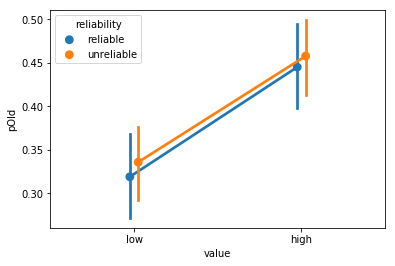

In [311]:
sns.pointplot(x='value',y='pOld',hue='reliability',
              data=agg_data,order=['low','high'],dodge=True)

plt.show()

This figure plots the group-level average proportion of choosing an old object during the test phase as a function of object value and circle stimulus reliability with 95% confidence intervals demonstrating measurement uncertainty.

The first thing to notice is that most subjects recall less than half of the objects from the training phase, even when the objects are high valued.

Second, as expected, participants tend to choose high valued objects more often than low valued objects

Lastly, we see that there is no reliable difference between the reliability conditions

---

### Performance is related to remembering old objects

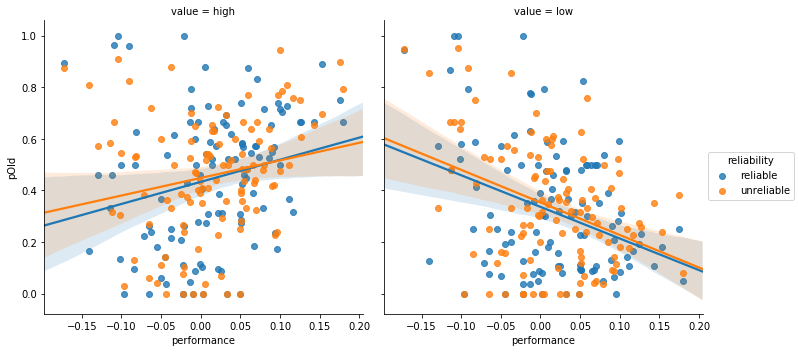

(0.21659319827842424, 0.001104938765720854)
(-0.36081544963473955, 2.7233713218998693e-08)


In [338]:
sns.lmplot(x='performance',y='pOld',hue='reliability',col='value',data=agg_data)
plt.show()

from scipy.stats import pearsonr
print(pearsonr(agg_data[agg_data.value == 'high'] \
               .pOld,agg_data[agg_data.value == 'high'].performance))
print(pearsonr(agg_data[agg_data.value == 'low'] \
               .pOld,agg_data[agg_data.value == 'low'].performance))

This figure plots the relationship between a participant's overall performance (their bonus earnings) and the proportion of old objects chosen as a function of circle reliability and object value during the test phase.

*I was primarily interested in seeing whether higher performing individuals demonstrated greater retrieval for old objects in the unreliable condition, but this does not appear to be the case.*

Unsurprisingly, choosing more options that yield 1.2 and avoiding fewer that yield 0 results in greater performance. Determining whether this is due to recollection of the objects or not is tricky. It is possible that recalling a high valued object leads individuals to choose that object. This would suggest that, irrespective of the incremental option, participants may better remember objects that were better/worse options. On the other hand, this relationship is, at least to some extent, guaranteed by the task design.

---

### Hierarchical linear modeling
To formally assess the visualizations above, we fit the following multilevel linear model to the data with random slopes:

*P(Old) ~ Times Clicked Out + Response Rate + Performance x Value x Reliability + (1 | Subject ID)*

Where the number of times each participant left the experiment, as well as their overall response rate, are included as nuisance variables. We model the three-way interaction plotted above between overall performance during the test phase, the value of the old object, and the level of reliability of the incremental signal.

In [316]:
# Hierarchical linear modeling

import statsmodels.api as sm
import statsmodels.formula.api as smf

model = "pOld ~ n_blurs + propResponse + performance*value*reliability"

md = smf.mixedlm(model,agg_data, groups=agg_data["pid"])

mdf = md.fit()
print(mdf.summary())

                            Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              pOld    
No. Observations:              448                  Method:                          REML    
No. Groups:                    112                  Scale:                           0.0197  
Min. group size:               4                    Likelihood:                      116.9895
Max. group size:               4                    Converged:                       Yes     
Mean group size:               4.0                                                           
---------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------
Intercept                                           2.155    0.434  4.966 0.000  1.304  

This model confirms the results from above:

- There is no effect of reliability
- There is a main effect of value such that participants are more likely to choose an old object with high value.
- There is a main effect of performance such that participants with greater performance are more likely to choose an old object.
- There is an interaction between performance and value

## Interim conclusion

**The reliability of the incremental stimuli does not appear to affect episodic choice in the current paradigm.**

Before thinking about why, let's verify that participants learned the way we predicted during the training phase. We expect participants to choose the reliable option more frequently and to recall high objects more frequently than low objects.

--- 

### Results: Training Phase

### During training, participants quickly learn to choose the reliable option

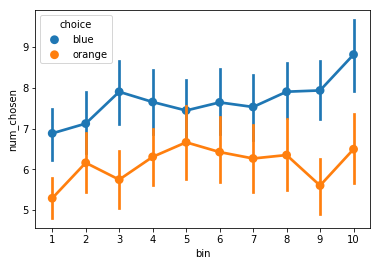

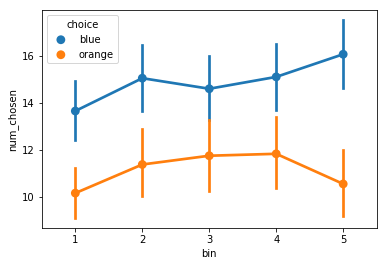

In [318]:
# Trials split into 10 bins
relOut = binChoices(data=data,n_bins=10,trialType='reliability')
sns.pointplot(x="bin",y="num_chosen",hue="choice",data=relOut)

# Trials split into 5 bins
plt.figure()
relOut = binChoices(data=data,n_bins=5,trialType='reliability')
sns.pointplot(x="bin",y="num_chosen",hue="choice",data=relOut)

plt.show()

These figures plot the frequency of choosing the reliable (here blue) and unreliable (here orange) options during the training phase. Trials are split into 10 and 5 bins respectively. We see that participants tend to choose the reliable option more frequently throughout the task, with a slight impact of experience.

---

In [323]:
model = "num_chosen ~ bin*choice"

md = smf.mixedlm(model, relOut, groups=relOut["pid"])

mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   num_chosen
No. Observations:    1015      Method:               REML      
No. Groups:          114       Scale:                49.6810   
Min. group size:     6         Likelihood:           -3434.4255
Max. group size:     10        Converged:            Yes       
Mean group size:     8.9                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            13.437    0.714 18.826 0.000 12.038 14.836
choice[T.orange]     -2.760    1.014 -2.722 0.006 -4.748 -0.773
bin                   0.496    0.213  2.327 0.020  0.078  0.914
bin:choice[T.orange] -0.319    0.310 -1.028 0.304 -0.928  0.289
Group Var             1.376    0.171                           



- There is an effect of choice such that the reliable option is chosen more frequently
- There is an effect of experience such that the reliable option is chosen more with greater experience

### During training, participants tend to choose the old object when it is presented

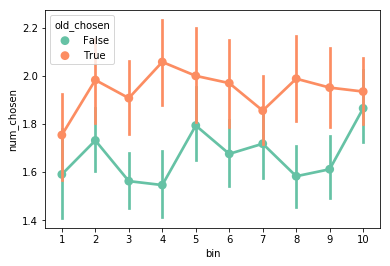

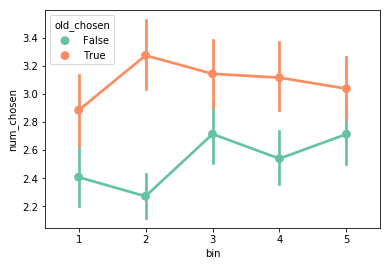

In [319]:
# Trials split into 10 bins
objOut = binChoices(data=data,n_bins=10,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="old_chosen",data=objOut,palette="Set2")

# Trials split into 5 bins
plt.figure()
objOut = binChoices(data=data,n_bins=5,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="old_chosen",data=objOut,palette="Set2")

plt.show()

These figures plot the frequency of choosing an old object during the training phase. Trials are split into 10 and 5 bins respectively. Note that old objects are not presented during the first 10 trials of the experiment and there is a 30% chance of seeing an old object on an object trial.

Participants peak in general object recollection after 120 trials.

### During training, participants choose more high valued old objects

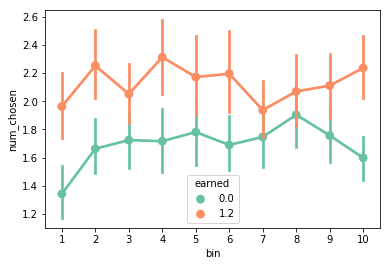

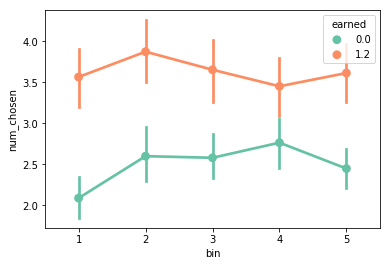

In [320]:
# Trials split into 10 bins
objOut = binChoices(data=data,n_bins=10,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="earned",data=objOut[objOut.old_chosen==True],palette="Set2")

# Trials split into 5 bins
plt.figure()
objOut = binChoices(data=data,n_bins=5,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="earned",data=objOut[objOut.old_chosen==True],palette="Set2")

plt.show()

In [324]:
model = "num_chosen ~ old_chosen + bin*earned"

md = smf.mixedlm(model, objOut, groups=objOut["pid"])

mdf = md.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  num_chosen
No. Observations:    2021     Method:              REML      
No. Groups:          114      Scale:               2.4525    
Min. group size:     12       Likelihood:          -3790.6169
Max. group size:     20       Converged:           Yes       
Mean group size:     17.7                                    
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           1.726    0.131 13.208 0.000  1.470  1.982
old_chosen[T.True]  0.578    0.070  8.279 0.000  0.441  0.715
bin                 0.112    0.036  3.061 0.002  0.040  0.183
earned              0.963    0.139  6.906 0.000  0.689  1.236
bin:earned         -0.080    0.041 -1.936 0.053 -0.161  0.001
Group Var           0.020    0.014                           



- Old objects are chosen more frequently than not
- High valued old objects are chosen more frequently than low valued old objects
- There is a marginal effect of experience such that greater experience leads to greater high valued objects being chosen

---
## Conclusions

1) During training, participants choose the reliable stimulus more frequently and choose high-valued old objects more frequently

2) During testing, participants are more likely to choose high-valued old objects and avoid low-valued old objects, but there is no effect of reliability


---

###### All functions used to generate the above plots are below

In [344]:
# Importing packages
%matplotlib inline
from __future__ import division
import warnings, os
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_generative(nTimepoints):
    reliableDist = np.round_(np.random.normal(0.6,0.05,nTimepoints),decimals=2)
    unreliableDist = np.round_(np.random.normal(0.6,0.2,nTimepoints),decimals=2)

    sns.distplot(reliableDist)
    sns.despine()
    plt.text(0.7,7,'Reliable',color='blue')
    sns.distplot(unreliableDist)
    plt.text(0.7,2.2,'Unreliable',color='orange')
    plt.plot([0,0],[0,10],'k--')
    plt.text(0.05,7,'Low value object',color='black')
    plt.plot([1.2,1.2],[0,10],'k--')
    plt.text(1.25,7,'High value object',color='black')
    plt.title('Outcome Generative Distributions')
    
def loadData(dType=None,dataDir="/Users/jonathan/shohamylab/jspych-exps/data/all_data",fileType="stateData"):
    data, exclude_pids = [], [] 
    dataFiles = [d for d in os.listdir(dataDir) if dType in d]
    for f in dataFiles:
        subData = pd.read_csv(os.path.join(dataDir,f))
        if dType == "interaction":
            if len(subData[subData.event == 'blur']) >= exclude_blur:
                exclude_pids.append(f.split('_')[0])
            subData['subjectID'] = [f.split('_')[0]] * len(subData)
        elif dType == "experiment":
            bonus = float(f.split('_')[2].replace('bonus',''))
            subData['bonus'] = [bonus] * len(subData)
        data.append(subData)
    data = pd.concat(data,ignore_index=True)
    return data, exclude_pids


def aggregateTestData(data=None, exclude_pids=None):
    
    pids = data.subjectID.unique()

    dOut = {'reliability':[],'value':[],'pOld':[],
            'pid':[],'bonus':[],'propResponse':[],
            'mean_rt':[]}
    for pid in pids:

        train_data = data[(data.test_part == 'train') & (data.subjectID == pid)]
        test_data = data[(data.test_part == 'test') & (data.subjectID == pid)]

        bonus = test_data.bonus.mean()

        nTrials = len(train_data)+len(test_data)

        cleaned_train = train_data[train_data.choice != 'no_response']
        cleaned_test = test_data[test_data.choice != 'no_response']

        nResponded = len(cleaned_train)+len(cleaned_test)
        proportionResponse = nResponded/nTrials

        old_test = cleaned_test[cleaned_test.old_trial == True]
        old_chosen = old_test[old_test.choice == 'object']

        if proportionResponse >= exclude_response and pid not in exclude_pids:

            colors = ['blue','orange']
            values = ['1.20','0.00']

            for c in colors:
                for v in values:
                    nTotal = len(old_test[(old_test.deck_type == c) & \
                                          (old_test.old_value == v)])
                    nChosen = len(old_chosen[(old_chosen.deck_type == c) & \
                                             (old_chosen.old_value == v)])

                    # number of old chosen/number of total old trials
                    pOld = nChosen/nTotal
                    
                    # mean RT for when the old items are chosen
                    meanRT = old_test[(old_test.deck_type == c) & \
                                    (old_test.old_value == v)].rt.mean()
                    

                    if c == 'blue':
                        rel = 'reliable'
                    else:
                        rel = 'unreliable'

                    if v == '1.20':
                        val = 'high'
                    else:
                        val = 'low'

                    dOut['reliability'].append(rel)
                    dOut['value'].append(val)
                    dOut['pOld'].append(pOld)
                    dOut['pid'].append(pid)
                    dOut['bonus'].append(bonus)
                    dOut['propResponse'].append(proportionResponse)
                    dOut['mean_rt'].append(meanRT)

    dOut = pd.DataFrame.from_dict(dOut)
    return dOut

def binChoices(data=None, n_bins=None, trialType=None):
    
    pids = data.subjectID.unique()
    
    relOut = []
    for pid in pids:

        test_data = data[(data.test_part == 'train') & (data.subjectID == pid)]
        train_data = data[(data.test_part == 'train') & (data.subjectID == pid)]

        bonus = train_data.bonus.mean()

        nTrials = len(train_data)+len(test_data)

        cleaned_train = train_data[train_data.choice != 'no_response'].reset_index()
        cleaned_test = test_data[test_data.choice != 'no_response'].reset_index()

        cleaned_train.loc[cleaned_train['choice'].str.contains('object'), 'choice'] = 'object'

        currBin = 0
        binWidth = int(len(cleaned_train)/n_bins)
        bins = []
        for i_row, row in cleaned_train.iterrows():
            if i_row % binWidth == 0:
                if currBin != n_bins:
                    currBin+=1

            bins.append(currBin)
        cleaned_train['bin'] = bins

        nResponded = len(cleaned_train)+len(cleaned_test)
        proportionResponse = nResponded/nTrials

        if proportionResponse >= exclude_response and pid not in exclude_pids:
            if trialType == "reliability":
                rel_chosen = cleaned_train[cleaned_train.choice != "object"] \
                .groupby(['bin','choice']).size().reset_index(name="num_chosen")
            elif trialType == "object":
                rel_chosen = cleaned_train[(cleaned_train.choice == "object") &
                                           (cleaned_train.old_trial == True)] \
                .groupby(['bin','earned','old_chosen']).size().reset_index(name="num_chosen")
            rel_chosen['pid'] = [pid] * len(rel_chosen)
            relOut.append(rel_chosen)

    relOut = pd.concat(relOut)
    if trialType == "object": relOut['earned'] = relOut['earned'].convert_objects(convert_numeric=True)
    return relOut

def gen_random_performance(data=None,n_sims=None):

    # Let's try and model guessing behavior
    # e.g. how much would we expect them to earn if they were just guessing?
    import random

    test_data = data[(data.test_part == 'test')]

    random_perf = {'pid':[],'random_test':[],'actual_earnings':[]}
    for pid in test_data.subjectID.unique():

        pid_data = test_data[test_data.subjectID == pid]

        earnings = pid_data[pid_data.earned != 'none'].earned
        total_earnings = np.sum(pd.to_numeric(earnings))

        sim_earnings = []
        for sim in range(n_sims):

            test_earnings = 0

            for i_row, row in pid_data.iterrows():

                reliableSample = np.round_(np.random.normal(0.6,0.05,1),decimals=2)
                unreliableSample = np.round_(np.random.normal(0.6,0.2,1),decimals=2)

                old_val = row.old_value
                deck_type = row.deck_type

                if old_val == 'none':
                    obj_val = random.choice([0,1.2])
                elif old_val == '0.00':
                    obj_val = 0
                elif old_val == '1.20':
                    obj_val = 1.2

                if deck_type == 'blue':
                    deck_val = reliableSample[0]
                else:
                    deck_val = unreliableSample[0]

                test_earnings+=random.choice([deck_val,obj_val])

            sim_earnings.append(test_earnings)

        random_perf['pid'].append(pid)
        random_perf['random_test'].append(np.mean(sim_earnings))
        random_perf['actual_earnings'].append(total_earnings)

    random_perf = pd.DataFrame.from_dict(random_perf)

    return random_perf

def get_blurs(x):
    if str(x) in n_blurs.subjectID.unique():
        pid_blurs = n_blurs[n_blurs.subjectID == str(x)].n_blurs.iloc[0]
        return pid_blurs
    else:
        # if not there, then they don't have any blurs
        return 0

def get_relative_perf(x):
    # calculate their performance relative to what is expected based on random guessing
    rand_perf = random_perf[random_perf.pid == x].random_test.iloc[0]
    actual_earnings = random_perf[random_perf.pid == x].actual_earnings.iloc[0]
    rel_perf = (actual_earnings*0.01) - (rand_perf*0.01)
    
    return rel_perf